In [8]:
import numpy as np
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from matplotlib import pyplot as plt
import pprint

### Read Dataset

In [9]:
import json
import pprint
with open("Data/dataset-berita-test.json", "r") as read_json:
    data = json.load(read_json)
#     pprint.pprint(data)

In [10]:
dataset = pd.read_json("Data/dataset-berita-test.json")
dataset.head()

,content,date,title,url
0,"Jakarta, CNN Indonesia -- Kuasa Hukum Komisari...",2015-01-28 16:58:00,"Eggi Sudjana: Budi Harus Dilantik, Bambang Har...",https://www.cnnindonesia.com/nasional/20150128...
1,"Jakarta, CNN Indonesia -- Tenggat waktu yang d...",2015-01-29 23:31:00,"Tenggat Lewat, Nasib Sandera Jepang dan Yordan...",https://www.cnnindonesia.com/internasional/201...
2,"Jakarta, CNN Indonesia -- Badan Koordinasi Pen...",2015-02-12 12:02:00,"Jepang Sesumbar Investasi US$ 1,3 Miliar di In...",https://www.cnnindonesia.com/ekonomi/201502121...
3,"Leverkusen, CNN Indonesia -- Pertandingan kera...",2015-02-26 05:12:00,Leverkusen Unggul 1-0 di Leg Pertama Kontra At...,https://www.cnnindonesia.com/olahraga/20150226...
4,"Jakarta, CNN Indonesia -- Menteri Energi dan S...",2015-03-02 12:44:00,Menteri ESDM: Mayoritas Pembangkit 35 Ribu MW ...,https://www.cnnindonesia.com/ekonomi/201503021...


In [11]:
type(dataset.iloc[0]["date"])

pandas._libs.tslibs.timestamps.Timestamp

In [12]:
data_test = dataset[["content"]]
data_test.head()

,content
0,"Jakarta, CNN Indonesia -- Kuasa Hukum Komisari..."
1,"Jakarta, CNN Indonesia -- Tenggat waktu yang d..."
2,"Jakarta, CNN Indonesia -- Badan Koordinasi Pen..."
3,"Leverkusen, CNN Indonesia -- Pertandingan kera..."
4,"Jakarta, CNN Indonesia -- Menteri Energi dan S..."


### Bag-of-word

In [13]:
vectorizer = CountVectorizer()
tf_matrix = vectorizer.fit_transform(data_test["content"])

vectorizer.get_feature_names()
# print("vacabulary_", vectorizer.vocabulary_)
# vocab.toarray().shape

['00',
 '000',
 '01',
 '02',
 '028',
 '04',
 '047',
 '06',
 '093',
 '10',
 '100',
 '101',
 '103',
 '1049',
 '109',
 '11',
 '112',
 '118',
 '12',
 '120',
 '121',
 '122',
 '124',
 '128',
 '13',
 '132',
 '133',
 '14',
 '141',
 '1442',
 '148',
 '15',
 '152',
 '156',
 '16',
 '160',
 '169',
 '17',
 '18',
 '180',
 '19',
 '195',
 '1950',
 '1953',
 '1971',
 '1976',
 '1987',
 '1990',
 '1993',
 '1995',
 '1996',
 '1999',
 '20',
 '200',
 '2001',
 '2004',
 '2005',
 '2009',
 '2010',
 '2011',
 '2012',
 '2013',
 '2014',
 '2015',
 '2016',
 '2017',
 '2018',
 '2019',
 '2020',
 '21',
 '215',
 '22',
 '23',
 '238',
 '24',
 '24k',
 '25',
 '2560x1440',
 '26',
 '260',
 '266',
 '267',
 '27',
 '277',
 '28',
 '29',
 '292',
 '2d',
 '30',
 '31',
 '316',
 '32',
 '33',
 '34',
 '340',
 '349',
 '35',
 '38',
 '381',
 '39',
 '3r',
 '40',
 '400',
 '416',
 '42',
 '430',
 '44',
 '45',
 '450',
 '46',
 '461',
 '48',
 '488',
 '49',
 '50',
 '500',
 '500cc',
 '51',
 '515',
 '520',
 '53',
 '54',
 '55',
 '57',
 '577',
 '58',
 '60',

In [14]:
tf_matrix.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [15]:
feature_names = vectorizer.get_feature_names()
tf_matrix_value = tf_matrix.toarray()
df_tf_matrix = pd.DataFrame(tf_matrix_value, columns=feature_names)
df_tf_matrix.head()

,00,000,01,02,028,04,047,06,093,10,...,yudhoyono,yukawa,yustanto,zein,zidane,zodiak,zoom,zoulba,zul,zulkarnain
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,2,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


### Membuat model LDA menggunakan Scikit-Learn

In [16]:
from sklearn.decomposition import LatentDirichletAllocation

lda_model = LatentDirichletAllocation(n_components = 12,
                                      max_iter = 10,
                                      learning_method='online',
                                      random_state=100,
                                      batch_size = 128,
                                      evaluate_every=-1,
                                      n_jobs=-1 )

lda_output = lda_model.fit_transform(tf_matrix)
lda_model

LatentDirichletAllocation(batch_size=128, doc_topic_prior=None,
                          evaluate_every=-1, learning_decay=0.7,
                          learning_method='online', learning_offset=10.0,
                          max_doc_update_iter=100, max_iter=10,
                          mean_change_tol=0.001, n_components=12, n_jobs=-1,
                          perp_tol=0.1, random_state=100, topic_word_prior=None,
                          total_samples=1000000.0, verbose=0)

___
#### Topic-Word Matrix

In [17]:
print("Matrix Topic-Word")

topic_word_columns = ""
df_topic_word = pd.DataFrame(lda_model.components_, columns=feature_names)
df_topic_word

Matrix Topic-Word


,00,000,01,02,028,04,047,06,093,10,...,yudhoyono,yukawa,yustanto,zein,zidane,zodiak,zoom,zoulba,zul,zulkarnain
0,0.230347,0.270337,0.282560,0.272939,0.262372,0.828316,0.267544,0.271340,0.276171,0.932683,...,0.305392,0.279203,0.265386,0.248396,0.263749,0.244828,0.242046,0.268627,0.271455,0.263788
1,0.301731,0.983613,0.258121,0.271535,0.256131,0.242302,0.271927,0.269687,0.280686,0.455241,...,0.256931,0.260061,0.246488,0.248944,0.237509,0.824281,0.258027,0.277865,0.268867,0.269476
2,0.248939,0.274279,0.268745,0.235043,0.252224,0.226209,0.935054,1.024770,0.267298,1.640324,...,0.254500,0.243434,0.308242,0.291902,0.265424,0.239732,0.247830,0.233172,0.282710,0.235700
3,0.288004,0.249171,0.283126,1.812257,0.251172,0.274891,0.265479,1.035964,0.262809,0.395815,...,0.329823,0.257749,0.300320,0.271401,0.274210,0.278350,0.269676,0.275180,0.322435,0.264944
4,0.518507,0.265094,0.272878,0.266530,0.267028,0.260533,0.248351,0.266004,0.273577,2.439857,...,0.283828,0.269190,0.249955,0.543195,0.274145,0.261016,0.293409,0.257449,2.964333,1.484887
5,0.282892,0.242768,0.274543,0.287301,0.245415,0.225741,0.258208,0.255471,0.270117,2.984914,...,0.282372,0.259746,0.255690,0.278672,0.274562,0.269054,0.263571,0.264323,0.275678,0.258847
6,0.245809,0.252804,0.266480,0.259187,0.261638,0.250525,0.271966,0.272832,0.293797,2.950058,...,0.289146,0.272696,0.274526,0.238271,0.256601,0.256743,1.030517,0.219300,0.316526,0.299029
7,0.246310,0.272542,0.276312,0.240759,0.299268,0.263431,0.269876,0.271228,0.245335,0.303514,...,0.245910,0.273930,0.253643,0.241443,0.260345,0.244993,0.295401,0.289942,0.249161,0.245515
8,0.247384,0.276579,0.275008,0.297557,0.259132,0.253458,0.249897,0.290721,0.229725,0.327331,...,0.297555,0.289172,0.247794,0.252740,0.263404,0.243617,0.282379,0.287693,0.295774,0.264390
9,0.303705,0.258410,0.314643,0.253070,0.251296,0.289729,0.287016,0.229427,0.249955,0.258649,...,0.287421,0.263519,0.261625,0.279869,0.261493,0.274221,0.305972,0.281275,0.264792,0.252052


___
#### Document-topic Matrix

In [18]:
lda_output

doc_topic_index = ["document " + str(num) for num in range(lda_output.shape[0])]
doc_topic_column = ["topic " + str(num) for num in range(lda_output.shape[1])]
df_doc_topic = pd.DataFrame(lda_output, index=doc_topic_index, columns=doc_topic_column)
# df_doc_topic.add_suffix('document')
print(df_doc_topic.shape)
df_doc_topic.head()

(62, 12)


,topic 0,topic 1,topic 2,topic 3,topic 4,topic 5,topic 6,topic 7,topic 8,topic 9,topic 10,topic 11
document 0,0.000347,0.000347,0.000347,0.000347,0.000347,0.613677,0.000347,0.000347,0.000347,0.000347,0.000347,0.382851
document 1,0.000219,0.000219,0.000219,0.000219,0.000219,0.000219,0.000219,0.000219,0.000219,0.000219,0.000219,0.997588
document 2,0.000174,0.000174,0.000174,0.000174,0.000174,0.000174,0.557144,0.000174,0.000174,0.000174,0.000174,0.441113
document 3,0.000162,0.000162,0.000162,0.000162,0.000162,0.000162,0.000162,0.000162,0.000162,0.000162,0.000162,0.998217
document 4,0.000311,0.000311,0.000311,0.000311,0.000311,0.000311,0.859069,0.000311,0.000311,0.000311,0.000311,0.137822


### Visualize LDA Model dengan pyLDAvis

In [19]:
import pyLDAvis
import pyLDAvis.sklearn
%matplotlib inline

D:\Dev\learn-python\ML\mlvenv\lib\site-packages\past\types\oldstr.py:5: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated, and in 3.8 it will stop working
  from collections import Iterable


In [20]:
pyLDAvis.enable_notebook()
panel = pyLDAvis.sklearn.prepare(lda_model, tf_matrix, vectorizer, mds='tsne')
panel

D:\Dev\learn-python\ML\mlvenv\lib\site-packages\pyLDAvis\_prepare.py:257: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  return pd.concat([default_term_info] + list(topic_dfs))


PreparedData(topic_coordinates=                x           y  topics  cluster       Freq
topic                                                    
11     127.056190  118.039360       1        1  70.678493
6      170.963165  -14.648319       2        1   8.331193
4       76.362869 -117.526299       3        1   4.310738
10      58.642048    9.526822       4        1   4.167535
5     -108.510803  168.741974       5        1   3.834064
1      -32.155140  -49.104847       6        1   3.588287
3      -56.319839 -161.428497       7        1   2.340867
2       -0.003044  100.315857       8        1   1.740126
0     -203.118195   65.858902       9        1   0.934922
8      -90.800484   41.683895      10        1   0.024591
9       24.183424  212.635605      11        1   0.024591
7     -159.209991  -66.836700      12        1   0.024591, topic_info=     Category        Freq         Term       Total  loglift  logprob
5087  Default  413.000000         yang  413.000000  30.0000  30.0000
1001  Default  364.000000           di  364.000000  29.0000  29.0000
938   Default  327.000000          dan  327.000000  28.0000  28.0000
972   Default  155.000000       dengan  155.000000  27.0000  27.0000
4960  Default  145.000000        untuk  145.000000  26.0000  26.0000
931   Default  131.000000        dalam  131.000000  25.0000  25.0000
1778  Default  152.000000          ini  152.000000  24.0000  24.0000
947   Default  158.000000         dari  158.000000  23.0000  23.0000
392   Default   40.000000         atau   40.000000  22.0000  22.0000
3380  Default  112.000000         pada  112.000000  21.0000  21.0000
222   Default  111.000000         akan  111.000000  20.0000  20.0000
3490  Default   28.000000       pemain   28.000000  19.0000  19.0000
4596  Default   72.000000        tahun   72.000000  18.0000  18.0000
4776  Default   78.000000     tersebut   78.000000  17.0000  17.0000
1929  Default   85.000000         juga   85.000000  16.0000  16.0000
177   Default   66.000000          ada   66.000000  15.0000  15.0000
2999  Default   59.000000      menjadi   59.000000  14.0000  14.0000
1833  Default  164.000000          itu  164.000000  13.0000  13.0000
2032  Default   89.000000           ke   89.000000  12.0000  12.0000
729   Default   72.000000         bisa   72.000000  11.0000  11.0000
1389  Default   13.000000        emoji   13.000000  10.0000  10.0000
4815  Default   93.000000        tidak   93.000000   9.0000   9.0000
3521  Default   25.000000   pemerintah   25.000000   8.0000   8.0000
2434  Default   48.000000        lebih   48.000000   7.0000   7.0000
1721  Default   36.000000           ia   36.000000   6.0000   6.0000
1763  Default   85.000000    indonesia   85.000000   5.0000   5.0000
1002  Default   31.000000          dia   31.000000   4.0000   4.0000
1851  Default   98.000000      jakarta   98.000000   3.0000   3.0000
3796  Default   33.000000   perusahaan   33.000000   2.0000   2.0000
945   Default   26.000000        dapat   26.000000   1.0000   1.0000
...       ...         ...          ...         ...      ...      ...
1848  Topic12    0.001208         jaga    1.896369   0.9521  -8.3574
1853  Topic12    0.001289        jaksa    3.621572   0.3697  -8.2929
4718  Topic12    0.001211    terganggu    1.944076   0.9294  -8.3553
4936  Topic12    0.001277         umat    3.716426   0.3345  -8.3022
2073  Topic12    0.001351     keduanya    7.970048  -0.3718  -8.2456
1618  Topic12    0.001329        hakim    8.061961  -0.3998  -8.2621
166   Topic12    0.001293     abipraya    5.377464  -0.0222  -8.2894
4535  Topic12    0.001280     subsider    4.571253   0.1297  -8.3000
1943  Topic12    0.001388         juta   20.905984  -1.3093  -8.2188
3006  Topic12    0.001274  menjanjikan    4.571417   0.1254  -8.3042
4704  Topic12    0.001292     terbukti    6.299559  -0.1818  -8.2908
1882  Topic12    0.001271         jaya    5.254667  -0.0162  -8.3065
3147  Topic12    0.001231    miliarder    2.761468   0.5947  -8.3390
2779  Topic12    0.001230      memukul  

### Probabilitas Topik terhadap Documen berita

In [21]:
df_doc_topic["published_at"] = dataset["date"].values
# df_doc_topic["year"] = df_doc_topic["published_at"].dt.year
df_doc_topic

,topic 0,topic 1,topic 2,topic 3,topic 4,topic 5,topic 6,topic 7,topic 8,topic 9,topic 10,topic 11,published_at
document 0,0.000347,0.000347,0.000347,0.000347,0.000347,0.613677,0.000347,0.000347,0.000347,0.000347,0.000347,0.382851,2015-01-28 16:58:00
document 1,0.000219,0.000219,0.000219,0.000219,0.000219,0.000219,0.000219,0.000219,0.000219,0.000219,0.000219,0.997588,2015-01-29 23:31:00
document 2,0.000174,0.000174,0.000174,0.000174,0.000174,0.000174,0.557144,0.000174,0.000174,0.000174,0.000174,0.441113,2015-02-12 12:02:00
document 3,0.000162,0.000162,0.000162,0.000162,0.000162,0.000162,0.000162,0.000162,0.000162,0.000162,0.000162,0.998217,2015-02-26 05:12:00
document 4,0.000311,0.000311,0.000311,0.000311,0.000311,0.000311,0.859069,0.000311,0.000311,0.000311,0.000311,0.137822,2015-03-02 12:44:00
document 5,0.000238,0.000238,0.000238,0.000238,0.000238,0.000238,0.997381,0.000238,0.000238,0.000238,0.000238,0.000238,2015-03-03 17:02:00
document 6,0.000391,0.592954,0.000391,0.000391,0.000391,0.000391,0.000391,0.000391,0.000391,0.000391,0.000391,0.403134,2015-03-25 09:33:00
document 7,0.000299,0.000299,0.000299,0.000299,0.000299,0.758429,0.000299,0.000299,0.000299,0.000299,0.000299,0.238585,2015-05-19 13:12:00
document 8,0.000299,0.000299,0.000299,0.000299,0.000299,0.758429,0.000299,0.000299,0.000299,0.000299,0.000299,0.238585,2015-05-19 13:12:00
document 9,0.000358,0.000358,0.000358,0.000358,0.000358,0.000358,0.000358,0.000358,0.000358,0.000358,0.563113,0.433310,2015-05-21 12:51:00


### Hitung total probabilitas topik berdasarkan tahun

In [22]:
df_doc_topic_grouped = df_doc_topic.groupby(df_doc_topic["published_at"].dt.year).sum()
df_doc_topic_grouped

,topic 0,topic 1,topic 2,topic 3,topic 4,topic 5,topic 6,topic 7,topic 8,topic 9,topic 10,topic 11
published_at,,,,,,,,,,,,
2015,0.004973,0.597536,0.778727,0.004973,0.004973,2.134563,2.417844,0.004973,0.004973,0.004973,0.567729,10.473761
2016,0.590472,1.772140,0.005710,1.404399,1.337307,0.005710,0.892600,0.005710,0.005710,0.005710,0.005710,16.968822
2017,0.006308,0.006308,0.686338,0.006308,2.395087,0.609026,2.455682,0.006308,0.006308,0.006308,1.844114,13.971902


### Visualize Hasil 

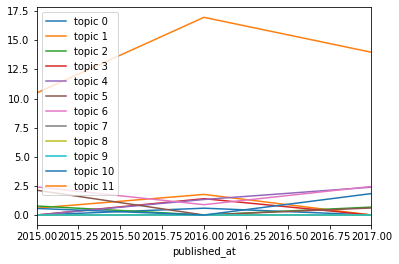

In [24]:
df_doc_topic_grouped.plot()
plt.show()

### Top keyword each topic

In [26]:
# Show top n keywords for each topic
def show_topics(vectorizer=vectorizer, lda_model=lda_model, n_words=20):
    keywords = np.array(vectorizer.get_feature_names())
    topic_keywords = []
    for topic_weights in lda_model.components_:
        top_keyword_locs = (-topic_weights).argsort()[:n_words]
        topic_keywords.append(keywords.take(top_keyword_locs))
    return topic_keywords

topic_keywords = show_topics(vectorizer=vectorizer, lda_model=lda_model, n_words=15)        

# Topic - Keywords Dataframe
df_topic_keywords = pd.DataFrame(topic_keywords)
df_topic_keywords.columns = ['Word '+str(i) for i in range(df_topic_keywords.shape[1])]
df_topic_keywords.index = ['Topic '+str(i) for i in range(df_topic_keywords.shape[0])]
df_topic_keywords

,Word 0,Word 1,Word 2,Word 3,Word 4,Word 5,Word 6,Word 7,Word 8,Word 9,Word 10,Word 11,Word 12,Word 13,Word 14
Topic 0,ihsg,david,saham,rentang,indeks,menguat,yang,perdagangan,di,terbatas,penguatan,sentimen,kuartal,terkoreksi,laba
Topic 1,emoji,holding,perangkat,google,atau,dan,dengan,desain,bpd,ponsel,dapat,ini,set,cyanogen,yang
Topic 2,tio,di,narkotik,lorenzo,dia,sabu,sakau,detik,dari,polisi,rutan,doni,lebih,gejala,selama
Topic 3,manfaat,pns,asuransi,yang,atau,tomita,dwiguna,selisih,persen,pmk,tht,meninggal,berhenti,januari,hasil
Topic 4,yang,pemain,comvalius,klub,di,kalau,xl,tottenham,united,mau,karyawan,yabes,dan,ada,bola
Topic 5,ptfi,pemerintah,penyaluran,kredit,infrastruktur,jonan,persen,bank,sektor,budi,pwc,jokowi,freeport,keputusan,menyebutkan
Topic 6,dan,di,investasi,yang,untuk,tersebut,tahun,s6,ini,harga,pemerintah,itu,dengan,pajak,migas
Topic 7,yang,dan,penjara,di,juta,dari,dalam,yohanes,keduanya,hakim,karena,uang,mengisyaratkan,abipraya,terbukti
Topic 8,dan,yang,di,dalam,dengan,ini,emoji,untuk,pada,dari,akan,menjadi,atau,ke,telah
Topic 9,di,dan,yang,dengan,pemain,akan,korea,anak,pada,ini,dari,tersebut,saya,untuk,baru
